## Business Understanding

SyriaTel is a telecommunication company that offers services to various customers. The company would like to reduce its loses by predicting how soon a customer will stop doing business with SyriaTel.

#### Research Questions

* What is the churn rate of customers at SyriaTel?






### Problem Statement
We aim to:
* Classify customers into loyal customers and churned customers based on churn.

### Objectives

* Engineer a binary target variable (churn) based on all the other features in the dataset apart form phone number.
* Train a classification model that categorises customers based on their loyalty to SyrialTel.
* Optimize the model's performance using feature engineering and hyperparemeter tuning.

### Data Understanding

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Data Cleaning:

#### Handling missing values

In [7]:
#check for null values
data.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


There are no missing values in our data

#### Handling duplicates

In [8]:
#check for duplicates
data.duplicated().sum()

0

There are no duplicates in our data

#### Correct datatypes in columns

In [9]:
#converting international plan to binary since its rows contain yes/no
data_clean = data.copy()
data_clean['international plan'] = data_clean['international plan'].apply(lambda x: 1 if x == 'yes' else 0)
data_clean.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
#converting voice mail plan to binary since its rows contain yes/no
data_clean['voice mail plan'] = data_clean['voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)
data_clean.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# converting churn from boolean to integer
# To make it easier for the models to interpret
data_clean['churn'] = data_clean['churn'].astype(int)
data_clean.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
# converting area code to categorical since it represents geographic codes
data_clean['area code'] = data_clean['area code'].astype('object')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Exploratory Data Analysis(EDA)

#### Feature distribution

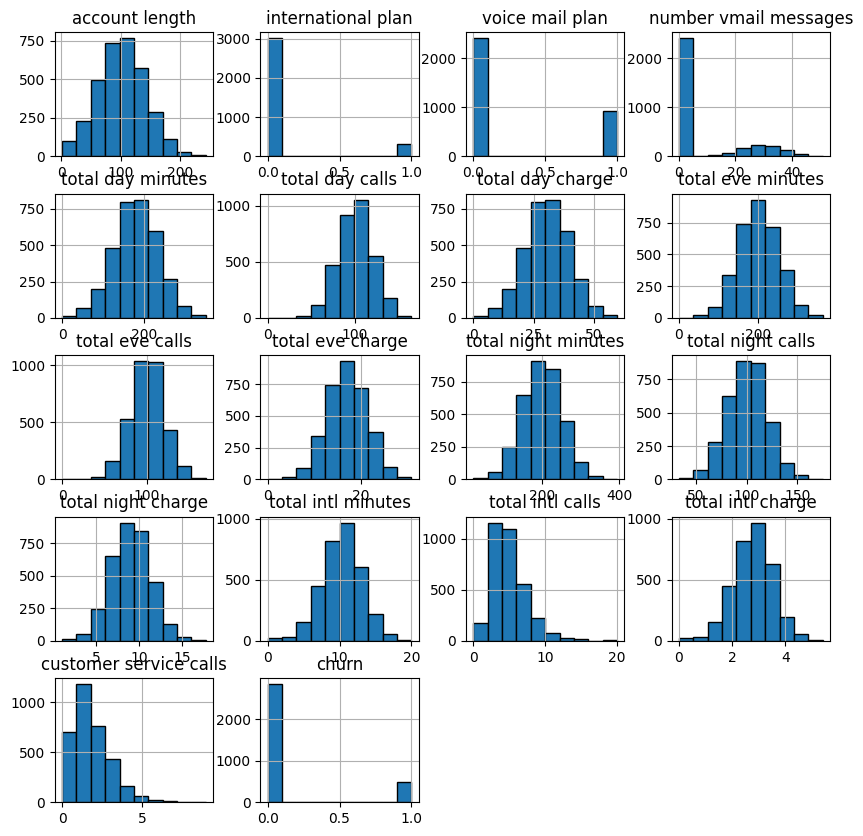

In [13]:
#create a histogram for numerical columns
numerical_cols = data_clean.select_dtypes(include=np.number).columns
data_clean[numerical_cols].hist(figsize=(10,10),edgecolor='black')
plt.show()

International plan, voice mail plan and churn have a high drop off rate since they are features with only two groups

#### Correlation analysis

In [14]:
# correlation matrix
numerical_data = data_clean.select_dtypes(include=np.number) # Select only numerical columns
corr_matrix = numerical_data.corr() # Calculate correlation matrix on numerical data only
corr_matrix

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


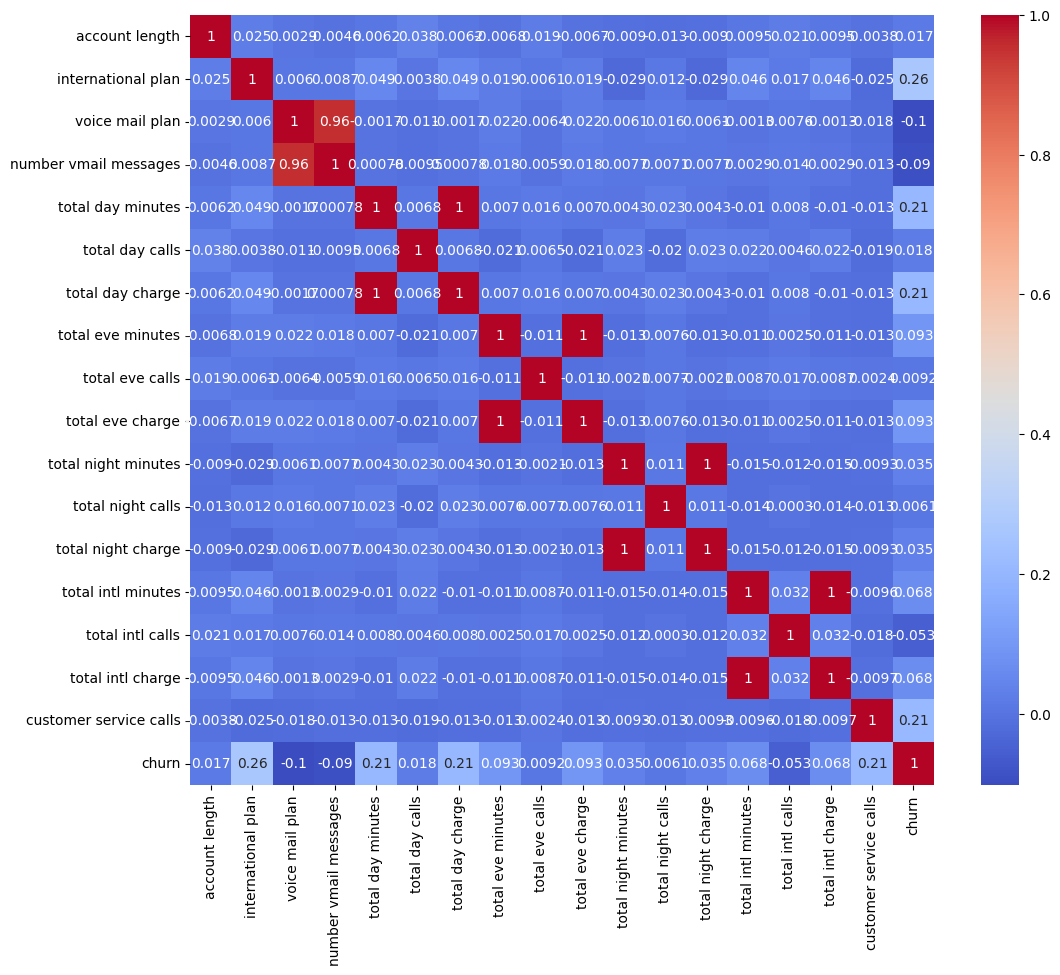

In [15]:
# plot a heatmap for visualisation
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



*   Total day charge, total day minutes and customer service calls have a high correlation with churn. These features will be useful in our analysis
*   Total minutes and total charges are almost perfect correlated. This means that charges are based on minutes



#### Feature Engineering

##### Drop redundant columns

*  We drop the colums with charges since they are based on minutes.
*  We will not need the customers' phone numbers



In [16]:
# Drop total charges and phone numbers
data_clean.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'phone number'], axis=1, inplace=True)
data_clean.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


##### Combining and calculating features with the same attributes

*   The number of minutes used by a customer equates to their total usage.



In [17]:
# Calculate total minutes
data_clean['total_minutes'] = data_clean['total day minutes'] + data_clean['total eve minutes'] + data_clean['total night minutes'] + data_clean['total intl minutes']
data_clean.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total_minutes
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,717.2
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,625.2
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,539.4
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,564.8
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,512.0


We will consider a complaint when the calls are more than 3 according to the ISO standardisation rules.

In [18]:
# Calculate high complaint from customer service calls
data_clean['high_complaint'] = data_clean['customer service calls'].apply(lambda x: 1 if x > 3 else 0)
data_clean.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total_minutes,high_complaint
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,717.2,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,625.2,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,539.4,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,564.8,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,512.0,0


### Preprocessing

#### Scaling

In [19]:
# Compute skewness for each numeric column
skewness = data_clean.select_dtypes(include=np.number).skew().sort_values(ascending = False)
skewness

,0
high_complaint,3.094972
international plan,2.726332
churn,2.018356
total intl calls,1.321478
number vmail messages,1.264824
customer service calls,1.091359
voice mail plan,0.999140
account length,0.096606
total night calls,0.032500
total night minutes,0.008921



*   Total international calls, number of voice mail messages and customer service calls are highly skewed.
*   Voice mail plan, account length, total night calls and total night minutes are slightly skewed



### Scaling

#### Log Transformation
Apply log transformation to the highly skewed columns to normalise the data

In [20]:
# Apply log transformation to the highly skewed columns
skewed_cols = ["total intl calls", "number vmail messages", "customer service calls"]
for col in skewed_cols:
    data_clean[f"log_{col}"] = np.log1p(data_clean[col])

# Verify new skewness after transformation
new_skewness = data_clean[[f"log_{col}" for col in skewed_cols]].skew()
new_skewness

,0
log_total intl calls,-0.199368
log_number vmail messages,1.028178
log_customer service calls,-0.138568



*   Total international calls and customer service calls skewness, has reduced.
*   Number of voice mail messages still has some skewness



In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3333 non-null   object 
 1   account length              3333 non-null   int64  
 2   area code                   3333 non-null   object 
 3   international plan          3333 non-null   int64  
 4   voice mail plan             3333 non-null   int64  
 5   number vmail messages       3333 non-null   int64  
 6   total day minutes           3333 non-null   float64
 7   total day calls             3333 non-null   int64  
 8   total eve minutes           3333 non-null   float64
 9   total eve calls             3333 non-null   int64  
 10  total night minutes         3333 non-null   float64
 11  total night calls           3333 non-null   int64  
 12  total intl minutes          3333 non-null   float64
 13  total intl calls            3333 

In [22]:
# drop originally skewed data
data_clean.drop(skewed_cols, axis=1, inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3333 non-null   object 
 1   account length              3333 non-null   int64  
 2   area code                   3333 non-null   object 
 3   international plan          3333 non-null   int64  
 4   voice mail plan             3333 non-null   int64  
 5   total day minutes           3333 non-null   float64
 6   total day calls             3333 non-null   int64  
 7   total eve minutes           3333 non-null   float64
 8   total eve calls             3333 non-null   int64  
 9   total night minutes         3333 non-null   float64
 10  total night calls           3333 non-null   int64  
 11  total intl minutes          3333 non-null   float64
 12  churn                       3333 non-null   int64  
 13  total_minutes               3333 

### Encoding

Apply one hot encoding to the categorical data

In [23]:
# categorical columns
categorical_cols = data_clean.select_dtypes(include='object').columns
categorical_cols

Index(['state', 'area code'], dtype='object')

In [24]:
# apply ohe to categorical columns
data_encoded = pd.get_dummies(data_clean, columns=categorical_cols, drop_first=True)
data_encoded.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,265.1,110,197.4,99,244.7,91,10.0,...,False,False,False,False,False,False,False,False,True,False
1,107,0,1,161.6,123,195.5,103,254.4,103,13.7,...,False,False,False,False,False,False,False,False,True,False
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,...,False,False,False,False,False,False,False,False,True,False
3,84,1,0,299.4,71,61.9,88,196.9,89,6.6,...,False,False,False,False,False,False,False,False,False,False
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,...,False,False,False,False,False,False,False,False,True,False


### Modeling

#### Logistic Regression

In [25]:
# Define features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = data_encoded.drop(columns=['churn'], axis=1)
y = data_encoded['churn']


In [26]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardise numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model
reg_model = LogisticRegression()
reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report(y_test, y_pred)

print('First Model')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))



First Model
Accuracy: 0.8530734632683659
Recall: 0.2376237623762376
Precision: 0.5333333333333333
F1-score: 0.3287671232876712
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       566
           1       0.53      0.24      0.33       101

    accuracy                           0.85       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.82      0.85      0.83       667





*   The accuracy for this mosel is 85%. Suggesting that the model is performing well overall
*   The recall of churners is at 23%. The model therefore misses 77% of actual churners
*   The precision and recall for class 1 are low compared to to class 0. This indicates a class imbalance
*   F1 score is 32%. This confirms the model is not well balanced.




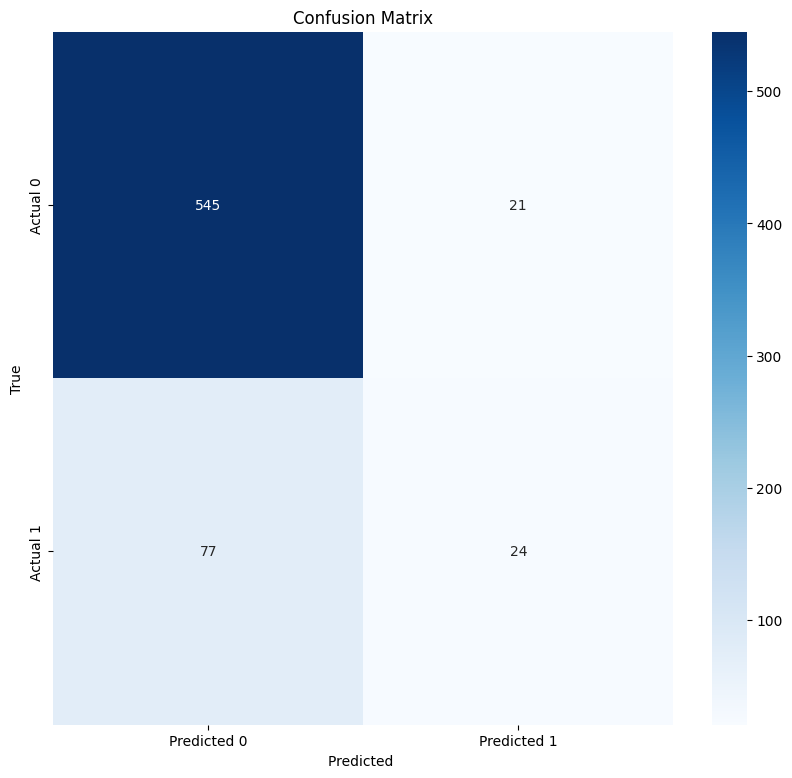

In [29]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted ")
plt.ylabel("True")
plt.show()

#### Class weighting

Since the logistic regression model indicates a class imbalance. Class weighting is suitable for dealing with class imbalance

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Train Logistic Regression with class weighting to handle imbalance
reg_model_weighted = LogisticRegression(random_state=42, class_weight="balanced")
reg_model_weighted.fit(X_train_scaled, y_train)

# Make predictions
y_pred_weighted = reg_model_weighted.predict(X_test_scaled)
y_pred_proba_weighted = reg_model_weighted.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance after applying class weights
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred)
roc_auc_weighted = roc_auc_score(y_test, y_pred_proba_weighted)
classification_rep_weighted = classification_report(y_test, y_pred_weighted)

print('Second Model')
print(f"Accuracy: {accuracy_weighted}")
print(f"Recall: {recall_weighted}")
print(f"Precision: {precision_weighted}")
print(f"F1-score: {f1_weighted}")
print(f"ROC AUC: {roc_auc_weighted}")

# Classification report
print(classification_report(y_test, y_pred))

Second Model
Accuracy: 0.8335832083958021
Recall: 0.2376237623762376
Precision: 0.5333333333333333
F1-score: 0.3287671232876712
ROC AUC: 0.8523947801140538
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       566
           1       0.53      0.24      0.33       101

    accuracy                           0.85       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.82      0.85      0.83       667



* Even with class weighting the recall for churners is still at 24%. Indicating that we still have a class imbalance problem.
* Next step is to train other models and see if they will give us a more suitable churn rate.

#### Decision Tree

Accuracy: 0.9295352323838081
Recall: 0.7722772277227723
Precision: 0.7647058823529411
F1-score: 0.7684729064039408
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.76      0.77      0.77       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



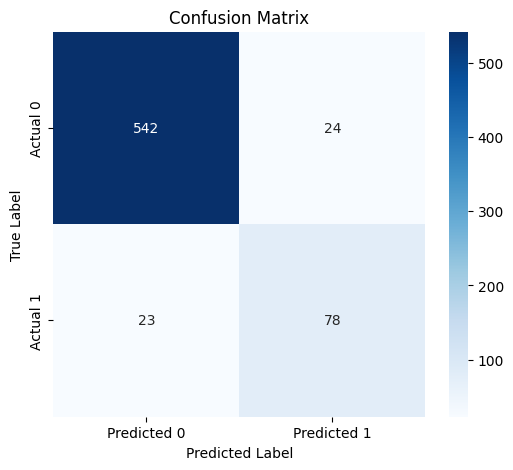

In [31]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Get a more detailed classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



*   The decision tree model has an accuracy of 93%.Suggesting overall good performance.
*   Recall of 77% for churned customers, means some customers who actually left were not predicted correctly.
The precision is at 76%, meaning that there are few incorrect churn predictions.
*   F1 score is 76%. This confirms the model is fairly balanced.




##### Hperparemeter tuning on decision tree model

In [32]:
#import necessary libraries
from sklearn.model_selection import  GridSearchCV
# Define hyperparameter grid for tuning
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Initialize Decision Tree Classifier
dt_model_tuned = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(dt_model_tuned, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = best_model.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

# Return the best parameters and updated model performance
print(f"Accuracy Tuned: {accuracy_tuned}")
print(f"Recall Tuned: {recall_tuned}")
print(f"Precision Tuned: {precision_tuned}")
print(f"F1-score Tuned: {f1_tuned}")
print(f"Best Parameters: {best_params}")
print(f"Classification Report Tuned:\n{classification_rep_tuned}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Accuracy Tuned: 0.9490254872563718
Recall Tuned: 0.7425742574257426
Precision Tuned: 0.9036144578313253
F1-score Tuned: 0.8152173913043478
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report Tuned:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.90      0.74      0.82       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667





*   The tuned model's accuracy  is 94%, suggesting an overall good performance.
*   The precision is higher compared to the previous model from 76% to 90%,meaning that most customers predicted as churners are actually churners.
*   Recall is at 74% for churners which is fair, meaning the model still misses some churners
*   F1 score is 81.5%. This confirms the model has good overall performance





#### Random Forest

In [33]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

#train_test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed
# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

# Get a more detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.952023988005997
Recall: 0.693069306930693
Precision: 0.9859154929577465
F1-score: 0.813953488372093
Accuracy: 0.952023988005997
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       566
           1       0.99      0.69      0.81       101

    accuracy                           0.95       667
   macro avg       0.97      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667





*   The model has a 95.2% accuracy, suggesting that the model is performing well overall.
*   Precision for churners is at 99% therefore there are few incorrect churn predictions.
*   The recall of churners at 69% is low. The model misses 31% of actual churners
* The F1 score is at 81% indicating the model is balanced.






#### Hyperparameter tuning on Random Forest Model

In [34]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV or GridSearchCV
# rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_model_tuned = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the randomized search to the data
# rf_random.fit(X_train, y_train)
rf_model_tuned.fit(X_train, y_train)


# Get the best estimator from the search
rf_model_tuned = rf_model_tuned.best_estimator_ #or rf_random.best_estimator_

# Make predictions using the tuned model
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the tuned model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Tuned Random Forest - Accuracy: {accuracy}")
print(f"Tuned Random Forest - Recall: {recall}")
print(f"Tuned Random Forest - Precision: {precision}")
print(f"Tuned Random Forest - F1-score: {f1}")

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned Random Forest - Accuracy: 0.952023988005997
Tuned Random Forest - Recall: 0.693069306930693
Tuned Random Forest - Precision: 0.9459459459459459
Tuned Random Forest - F1-score: 0.8
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.95      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667



*   The model has a 93% accuracy, suggesting that the model is performing well overall.
*   Precision for churners is at 95% therefore there are few incorrect churn predictions.
*   The recall of churners at 77% is low. Which is an improvement from the previous model.

### Support Vector Machine

In [35]:
from sklearn.svm import SVC


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVC model
svc_model = SVC(random_state=42)  # You can adjust hyperparameters here
svc_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.8680659670164917
Recall: 0.19801980198019803
Precision: 0.7407407407407407
F1-score: 0.3125
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       566
           1       0.74      0.20      0.31       101

    accuracy                           0.87       667
   macro avg       0.81      0.59      0.62       667
weighted avg       0.85      0.87      0.83       667



*   The model has a 86% accuracy, suggesting that the model is performing well overall.
*   Precision for churners is at 74% therefore there are few incorrect churn predictions.
*   The recall of churners at 20% is low. The model misses 80% of actual churners
* The F1 score is low at 31% suggesting that the model is now well balanced.

#### Naive Bayes


In [36]:
from sklearn.naive_bayes import GaussianNB

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))




Accuracy: 0.5877061469265368
Recall: 0.5841584158415841
Precision: 0.20205479452054795
F1-score: 0.30025445292620867
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       566
           1       0.20      0.58      0.30       101

    accuracy                           0.59       667
   macro avg       0.55      0.59      0.50       667
weighted avg       0.78      0.59      0.65       667



* The model has a 58% accuracy, suggesting that the model is struggling to make accurate predictions overall.
*   Precision for churners is at 20% therefore the number of mistakenly churned customers is high.
*   The recall of churners at 58% . The model misses 42% of actual churners
* The F1 score is at 30%, indcating that the model is not well balanced.

#### XG Boost

In [37]:
#install XGBoost
!pip install xgboost==1.7.5

#import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# make prdictions
y_pred = xgb_model.predict(X_test_scaled)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
Accuracy: 0.9655172413793104
Recall: 0.7920792079207921
Precision: 0.975609756097561
F1-score: 0.8743169398907104
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       0.98      0.79      0.87       101

    accuracy                           0.97       667
   macro avg       0.97      0.89      0.93       667
weighted avg       0.97      0.97      0.96       667



* The model has a 96% accuracy, suggesting that the model is working well overall
*   Precision for churners is at 98% there were few customers mistakenly labeled as churners
*   The recall of churners at 79% . The model missed around 21% of actual chrners which is much better compared to the low recall in the other models.
* The F1 score is 87% suggesting that the model is well balanced.

#### Model Evaluation

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-score
3              XGBoost  0.965517   0.975610  0.792079  0.874317
2        Random Forest  0.952024   0.985915  0.693069  0.813953
1        Decision Tree  0.947526   0.883721  0.752475  0.812834
0  Logistic Regression  0.853073   0.533333  0.237624  0.328767
4                  SVM  0.848576   0.500000  0.227723  0.312925
5          Naive Bayes  0.587706   0.202055  0.584158  0.300254


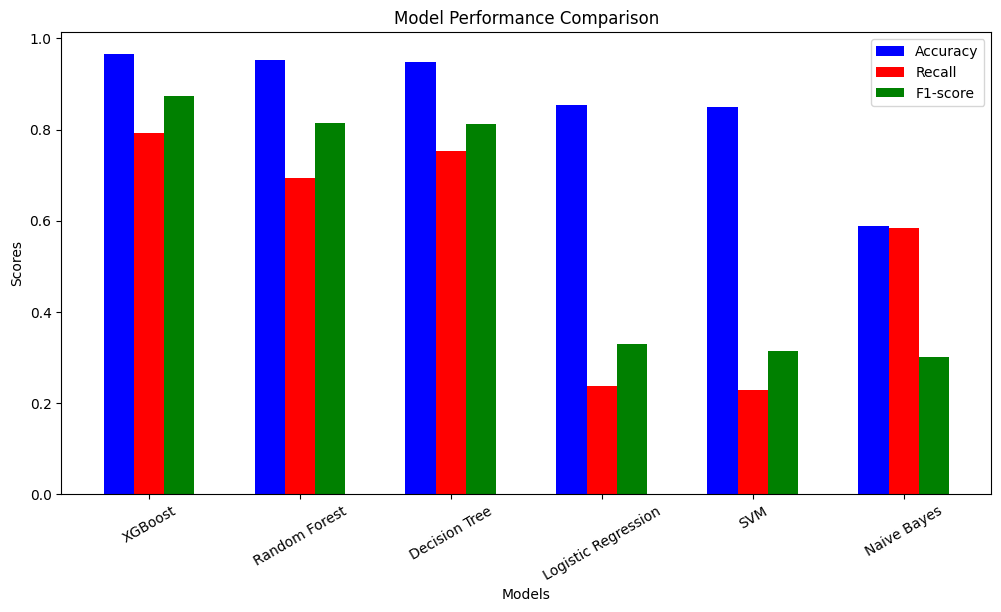

In [38]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, criterion='gini'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost":xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB()
}

# Store model results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1})

# Convert results to DataFrame
df_results = pd.DataFrame(results).sort_values(by="F1-score", ascending=False)
print("Model Performance Comparison:")
print(df_results)

# Bar chart visualization
x = np.arange(len(df_results))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width, df_results["Accuracy"], width, label='Accuracy', color='blue')
ax.bar(x, df_results["Recall"], width, label='Recall', color='red')
ax.bar(x + width, df_results["F1-score"], width, label='F1-score', color='green')

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(df_results["Model"], rotation=30)
ax.legend()
plt.show()




From the above visualisation we see that XG Boost has the best overall performance.
* It has an accuracy of 97%, indicating a strong overall prediction ability.
* The model has the best precision at 98% suggesting fewer false positives and a high recall of 79% ensuring many actual churn cases are identified.
* It has the F1-score, making it the most balanced model.

#### Conclusion and Recommendation

* The evaluation metrics used in our models to predict churn rate are **accuracy**, **recall**, **precision** and **F1 score**. Recall was used in predicting the number of churners,Precision has been used for churn predctions and F1 score gives us a balance of both precision and recall.Accuracy suggests the overall performance of each model.
* The **best** overall model for predicting churn rate is **XG Boost**.It has high accuracy,precision, recall and F1 score. Additionally the few false positives and false negatives, makes it a great model for predicting churn.
* **Decision tree** and **Random Forest** are strong alternatives to XG Boost since their parameters have a slight difference when compared to XG Boost
* **Logistic regression** performed poorly in identifying churners even after class weighting.
* **SVM model** struggled to detect churners. The recall for churners was too low meanig many customers at risk of leaving are not identified.
* **Naive Bayes model** performed poorly in prdeicting customer churn. Low precision and F1 score fo churners suggest high false positive rates,making it unreliale for decsion making.
* There was a class imbalance with the number of churned customers and loyal customers, so during train-test splits smaller sample categories could all be included in either the training set or testing set.